In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('credit_card_fraud_detection.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5040 non-null   int64  
 1   type            5040 non-null   object 
 2   amount          5040 non-null   float64
 3   nameOrig        5040 non-null   object 
 4   oldbalanceOrg   5040 non-null   float64
 5   newbalanceOrig  5040 non-null   float64
 6   nameDest        5040 non-null   object 
 7   oldbalanceDest  5040 non-null   float64
 8   newbalanceDest  5040 non-null   float64
 9   isFraud         5040 non-null   int64  
 10  isFlaggedFraud  5040 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 433.2+ KB


<AxesSubplot:>

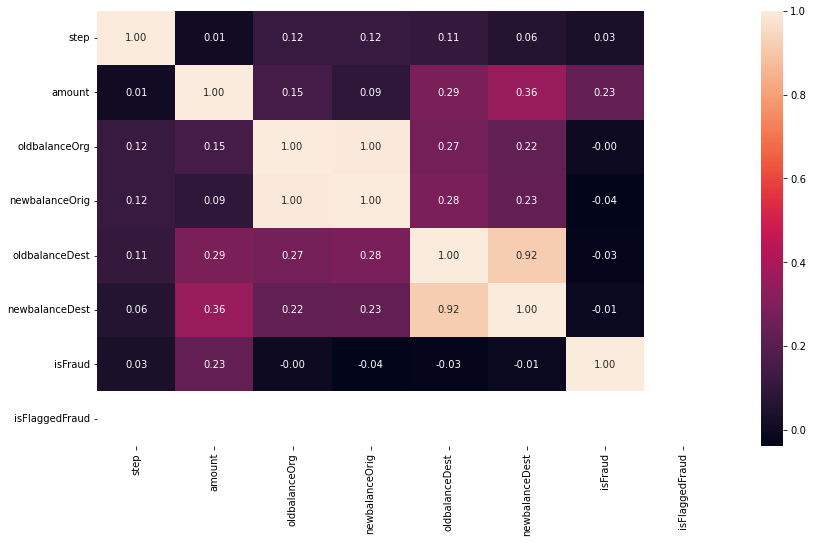

In [3]:
plt.figure(figsize=(14,8))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')

In [4]:
df.sample(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1036,1,PAYMENT,881.26,C1997344422,5386.0,4504.74,M1220806149,0.0,0.0,0,0
3387,2,PAYMENT,5127.21,C27294710,15743.0,10615.79,M1276002922,0.0,0.0,0,0


In [5]:
df.isna().sum().sum()

0

In [6]:
df1=df.drop(['nameOrig','oldbalanceOrg','nameDest','newbalanceDest','isFlaggedFraud'],axis=1)

In [7]:
df1.head()

,step,type,amount,newbalanceOrig,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,160296.36,0.0,0
1,1,PAYMENT,1864.28,19384.72,0.0,0
2,1,TRANSFER,181.00,0.00,0.0,1
3,1,CASH_OUT,181.00,0.00,21182.0,1
4,1,PAYMENT,11668.14,29885.86,0.0,0


In [8]:
df1.step.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [9]:
df1.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
X=df1.drop('isFraud',axis=1)
y=df1['isFraud']

In [11]:
X.ndim,y.ndim

(2, 1)

In [12]:
X[:2]

,step,type,amount,newbalanceOrig,oldbalanceDest
0,1,PAYMENT,9839.64,160296.36,0.0
1,1,PAYMENT,1864.28,19384.72,0.0


In [13]:
X.describe()

,step,amount,newbalanceOrig,oldbalanceDest
count,5040.000000,5.040000e+03,5.040000e+03,5.040000e+03
mean,1.916071,1.012205e+05,1.072802e+06,9.204490e+05
std,1.203083,2.999571e+05,2.350751e+06,2.550609e+06
min,1.000000,6.420000e+00,0.000000e+00,0.000000e+00
25%,1.000000,3.734922e+03,0.000000e+00,0.000000e+00
50%,1.000000,1.094181e+04,1.816953e+04,0.000000e+00
75%,3.000000,1.084829e+05,3.064761e+05,3.621480e+05
max,5.000000,1.000000e+07,1.300000e+07,1.950000e+07


In [14]:
y.value_counts()

0    5000
1      40
Name: isFraud, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=60)

In [16]:
X_train[:2]

,step,type,amount,newbalanceOrig,oldbalanceDest
3114,2,PAYMENT,3319.89,0.00,0.0
248,1,PAYMENT,7600.57,43146.43,0.0


In [17]:
y_train[:4]

3114    0
248     0
4118    0
4235    0
Name: isFraud, dtype: int64

In [18]:
y_train.value_counts()

0    4002
1      30
Name: isFraud, dtype: int64

In [19]:
y_test.value_counts()

0    998
1     10
Name: isFraud, dtype: int64

In [20]:
X_train[:2]

,step,type,amount,newbalanceOrig,oldbalanceDest
3114,2,PAYMENT,3319.89,0.00,0.0
248,1,PAYMENT,7600.57,43146.43,0.0


In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse=False)

In [22]:
X_train_new=ohe.fit_transform(X_train[['type']])
X_test_new=ohe.transform(X_test[['type']])

In [23]:
X_train_new

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [24]:
X_train.drop('type',axis=1,inplace=True)
X_test.drop('type',axis=1,inplace=True)

In [25]:
X_train[:4]

,step,amount,newbalanceOrig,oldbalanceDest
3114,2,3319.89,0.00,0.00
248,1,7600.57,43146.43,0.00
4118,3,374.85,0.00,0.00
4235,3,88793.94,0.00,125226.99


In [26]:
X_train_final=np.hstack((X_train,X_train_new))
X_test_final=np.hstack((X_test,X_test_new))

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [28]:
X_train_final=scaler.fit_transform(X_train_final)
X_test_final=scaler.transform(X_test_final)

In [29]:
y_train.value_counts()

0    4002
1      30
Name: isFraud, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [31]:
X_train_final,y_train=sm.fit_resample(X_train_final,y_train)

In [32]:
y_train.value_counts()

0    4002
1    4002
Name: isFraud, dtype: int64

In [33]:
X_test_final,y_test=sm.fit_resample(X_test_final,y_test)

In [34]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [35]:
classifier.fit(X_train_final,y_train)

LogisticRegression()

In [36]:
y_pred=classifier.predict(X_test_final)
y_pred[:3]

array([1, 0, 0], dtype=int64)

In [37]:
y_test[:3]

0    0
1    0
2    0
Name: isFraud, dtype: int64

In [38]:
classifier.score(X_test_final,y_test)

0.9193386773547094

In [39]:
classifier.score(X_train_final,y_train)

0.9174162918540729

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[837 161]
 [  0 998]]


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       998
           1       0.86      1.00      0.93       998

    accuracy                           0.92      1996
   macro avg       0.93      0.92      0.92      1996
weighted avg       0.93      0.92      0.92      1996

